In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas_datareader as web
import datetime
from datetime import date
import yfinance as yf
%matplotlib inline

In [41]:
ticker = "BAJFINANCE.NS"
per="5y"
inter="1d"

# Fetch stock data from Yahoo Finance
stock_data = yf.download(tickers=ticker, period=per,interval=inter)
# Extract the desired columns: Date, Open, High, Low, Close, and Adj Close
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
# Reset the index to make the 'Date' column a regular column
stock_data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [42]:
#MACD
stock_data['EMA_26']=stock_data['Close'].ewm(span=26).mean()
stock_data['EMA_12']=stock_data['Close'].ewm(span=12).mean()
stock_data['MACD Line']=stock_data['EMA_12']-stock_data['EMA_26']
stock_data['MACD signal']=stock_data['MACD Line'].ewm(span=9).mean()



/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/16991348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['EMA_26']=stock_data['Close'].ewm(span=26).mean()
/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/16991348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['EMA_12']=stock_data['Close'].ewm(span=12).mean()
/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/16991348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

In [43]:
#RSI indicator
stock_data['diff']=stock_data['Close']-stock_data['Open']
stock_data['diff'] = stock_data['Close'] - stock_data['Open']
stock_data['gain'] = stock_data['diff'].apply(lambda x: x if x >= 0 else 0)
stock_data['loss'] = stock_data['diff'].apply(lambda x: abs(x) if x < 0 else 0)
stock_data['avg gain']=stock_data['gain'].rolling(window=18).mean()
stock_data['avg loss']=stock_data['loss'].rolling(window=18).mean()
#Calculate RS value
stock_data['RS_18'] = stock_data['avg gain'] / stock_data['avg loss']
#Calculate RSI value
stock_data['RSI'] = 100 - (100/(1+stock_data['RS_18']))


/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/2145538238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['diff']=stock_data['Close']-stock_data['Open']
/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/2145538238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['diff'] = stock_data['Close'] - stock_data['Open']
/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/2145538238.py:4: SettingWithCopyWarning: 
A value is trying to be set o

In [44]:
# stochastic indicator
stock_data['14_days_low'] = stock_data['Low'].rolling(window=14).min()
stock_data['14_days_high'] = stock_data['High'].rolling(window=14).max()
stock_data['stochastic value'] = ((stock_data['Close'] - stock_data['14_days_low']) / (stock_data['14_days_high'] - stock_data['14_days_low'])) * 100
stock_data['Stochastic_oscillator']=stock_data['stochastic value'].rolling(window=3).mean()


/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/4281429787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['14_days_low'] = stock_data['Low'].rolling(window=14).min()
/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/4281429787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['14_days_high'] = stock_data['High'].rolling(window=14).max()
/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/4281429787.py:4: SettingWithCopyWarning: 
A val

In [45]:
# MACD crossover
import math
stock_data['Signal_MACD'] = np.where(stock_data['MACD Line'] > stock_data['MACD signal'], 1.0, 0.0)
stock_data['Position_MACD'] = stock_data['Signal_MACD'].diff()
#csv file data
shareqant=[]
date_trade=[]
trade_type=[]
value=[]
#calculation /backtesting
shares_held=0
trade_results = []
stop_loss = 0.05
avg_purchase_price=0.0
money=1000000
portfolio_value=1000000.0


stock_data['Final_Signal'] = 0.0 
for i in range(1, len(stock_data)):
    if stock_data.at[i,'Position_MACD'] == 1.0:
        # checking fr RSI
        if  stock_data.at[i,'RSI']<=75:
            # checking fr stochastic 
            if stock_data.at[i,'stochastic value'] >= stock_data.at[i,'Stochastic_oscillator'] :
                if shares_held == 0:
                    buy_price = stock_data.at[i, 'Close']
                    share_purchase=int(40*math.sqrt(75-int(stock_data.at[i,'RSI'])))
                    
                    if(money>0):
                        if(buy_price*share_purchase<=money):
                            shares_held += int(share_purchase)
                            avg_purchase_price = buy_price
                            stock_data.loc[i,'Final_Signal'] = 1.00
                        else:
                            share_purchase=int(money/buy_price)
                            shares_held += share_purchase
                            avg_purchase_price = buy_price
                            stock_data.loc[i,'Final_Signal'] = 1.00
                        money-=buy_price*share_purchase    
                        
                else :
                    current_buy_price = stock_data.at[i, 'Close']
                    share_purchase=int(40*math.sqrt(75-int(stock_data.at[i,'RSI'])))
                    if(money>0):
                        if(buy_price*share_purchase<=money):
                            shares_held += share_purchase
                            avg_purchase_price = (avg_purchase_price * (shares_held-share_purchase) + current_buy_price * share_purchase) / (shares_held )
                            stock_data.loc[i,'Final_Signal']=1.0
                        else:
                            share_purchase=int(money/buy_price)
                            shares_held += share_purchase
                            avg_purchase_price = (avg_purchase_price * (shares_held-share_purchase) + current_buy_price * share_purchase) / (shares_held )
                            stock_data.loc[i,'Final_Signal']=1.0
                        money-=buy_price*share_purchase
    elif stock_data.at[i,'Position_MACD'] == -1.0:
        # checking fr RSI
        if stock_data.at[i,'RSI']>=25:
            # checking fr stochastic
            if stock_data.at[i,'stochastic value'] <= stock_data.at[i,'Stochastic_oscillator'] :
                sell_price = stock_data.at[i, 'Close']
                
                # Sell process
                if(shares_held>1) :   
                    share_sell=int(40*math.sqrt(int(stock_data.at[i,'RSI'])-25))
                    trade_result = (sell_price - avg_purchase_price) * min(share_sell,shares_held)
                    trade_results.append(trade_result)
                    money+=sell_price*min(share_sell,shares_held)
                    shares_held=shares_held-min(share_sell,shares_held)
                    stock_data.loc[i,'Final_Signal'] = -1.0
    elif shares_held>1 and stock_data.at[i,'Close']<=0.9*avg_purchase_price :#stop loss           
            share_sell=int(shares_held/2)
            trade_result = (sell_price - avg_purchase_price) * share_sell
            trade_results.append(trade_result)
            money+=sell_price*min(share_sell,shares_held)
            shares_held=shares_held-share_sell
            stock_data.loc[i,'Final_Signal'] = -1.0  
                     
    #portfolio value
    portfolio_value=money+(stock_data.at[i,'Close'])*shares_held
    stock_data.at[i,'portfolio_value']=portfolio_value
    stock_data.at[i, 'Daily_return'] = (portfolio_value - stock_data.at[i - 1, 'portfolio_value']) / stock_data.at[i - 1, 'portfolio_value'] 
    #data to be added in csv file
    if(stock_data.at[i,'Final_Signal']==1.0):
         date_trade.append(stock_data.at[i,'Date'])
         trade_type.append("BUY")
         value.append(stock_data.at[i,'portfolio_value'])
         shareqant.append(shares_held)  
    elif(stock_data.at[i,'Final_Signal']==-1.0):
         date_trade.append(stock_data.at[i,'Date'])
         trade_type.append("SELL")
         value.append(stock_data.at[i,'portfolio_value'])
         shareqant.append(shares_held) 

/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/793866988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Signal_MACD'] = np.where(stock_data['MACD Line'] > stock_data['MACD signal'], 1.0, 0.0)
/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/793866988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Position_MACD'] = stock_data['Signal_MACD'].diff()
/var/folders/gx/2ypdsjmn6sv2sn52lk_kbxc00000gn/T/ipykernel_58927/793866988.py:19: SettingWithCo

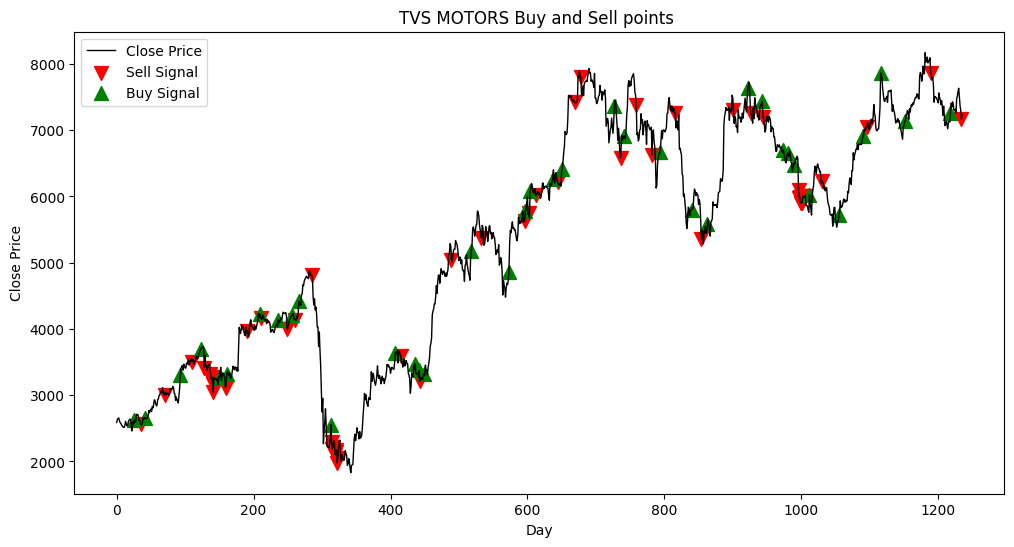

In [46]:
buy_signals = stock_data[stock_data['Final_Signal'] == 1]
sell_signals = stock_data[stock_data['Final_Signal'] == -1]

# Plot the close price
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='black', lw=1)
# Plot buy and sell signals

plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', s=100)
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', s=100)

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('TVS MOTORS Buy and Sell points ')


# Add legend
plt.legend()

# Show the plot
plt.show()
#csv file content
data = pd.DataFrame({'date': date_trade, 'trade': trade_type,'share quantity':shareqant ,'portfolio value': value})
data.to_csv('trades_TVS.csv', index=False)

In [47]:
#deliverables            
# profit loss count and value
profit_count = sum(1 for result in trade_results if result > 0)
loss_count = sum(1 for result in trade_results if result < 0)
largest_profit = max(trade_results, default=0)
largest_loss = min(trade_results, default=0)
largest_loss=min(0,largest_loss)
total_profit = sum(result for result in trade_results if result > 0)
total_loss = sum(result for result in trade_results if result < 0)
#benchmark return
ending_value=portfolio_value
beginning_value=1000000
num=(beginning_value/stock_data['Close'][0])
benchmark_return=(num*stock_data['Close'][len(stock_data)-1])-beginning_value
#annualized return
number_of_years=5
annualized_return=((ending_value / beginning_value) ** (1 / number_of_years)) - 1
annualized_return=annualized_return*100
#sharpe ratio 
avg_daily_return = stock_data['Daily_return'].mean()*255
risk_free_rate = 0.05  
portfolio_volatility = stock_data['Daily_return'].std()*16
sharpe_ratio = (avg_daily_return - risk_free_rate) / portfolio_volatility
#maximum drawdown 
comp_ret=(stock_data['Daily_return']+1).cumprod()
peak=comp_ret.expanding(min_periods=1).max()
dd=(comp_ret/peak)-1
max_drawdown=dd.min()


print("annualized returns:",annualized_return)
print("benchmark_return:",benchmark_return)
print("maximum drawdown:",max_drawdown)
print("sharpe ratio:",sharpe_ratio)
print("Win ratio:",profit_count/len(trade_results))
print("Total number of trades:", len(trade_results))
print("Number of profitable trades:", profit_count)
print("Number of losing trades:", loss_count)
print("Largest profit:", largest_profit)
print("Largest loss:", largest_loss)
print("Total profit:", total_profit)
print("Total loss:", total_loss)
print("end portfolio,:",portfolio_value)
print("return",total_profit+total_loss)
print("ROI:",(total_profit+total_loss)/10000)

annualized returns: 54.878703170636236
benchmark_return: 1795566.580094718
maximum drawdown: -0.23418179915096216
sharpe ratio: 1.72411441031143
Win ratio: 0.5172413793103449
Total number of trades: 58
Number of profitable trades: 30
Number of losing trades: 28
Largest profit: 415631.72461567516
Largest loss: -304625.5438739539
Total profit: 4058236.7550273137
Total loss: -965150.412565879
end portfolio,: 8911658.130859375
return 3093086.3424614347
ROI: 309.30863424614347


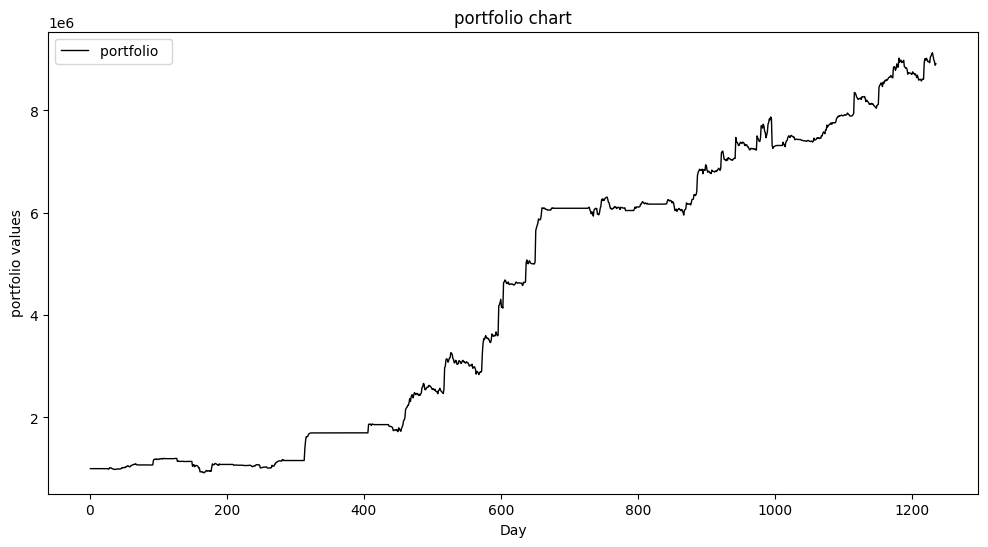

In [48]:
# Plot the portfolio price
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['portfolio_value'], label='portfolio  ', color='black', lw=1)
# Add labels and title
plt.xlabel('Day')
plt.ylabel('portfolio values')
plt.title('portfolio chart')

# Add legend
plt.legend()

# Show the plot
plt.show()

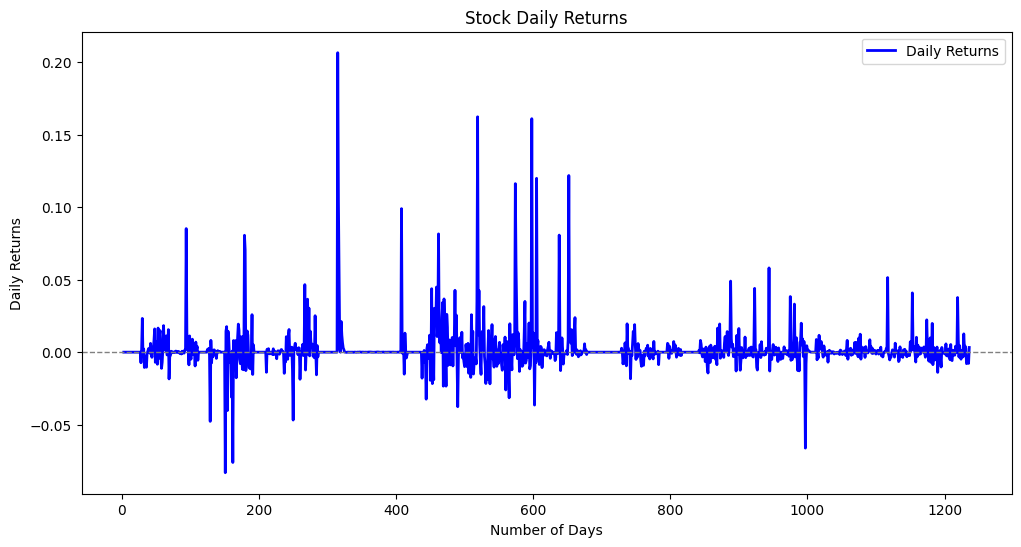

In [49]:
daily_returns = stock_data['Daily_return']

# Create a range of numbers for the x-axis representing the number of days
x_axis = range(1, len(daily_returns) + 1)

# Plot the daily returns
plt.figure(figsize=(12, 6))
plt.plot(x_axis, daily_returns, label='Daily Returns', color='blue', lw=2)

# Add labels and title
plt.xlabel('Number of Days')
plt.ylabel('Daily Returns')
plt.title('Stock Daily Returns')

# Add a horizontal line at 0 (representing no return)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Add legend
plt.legend()

# Show the plot
plt.show()

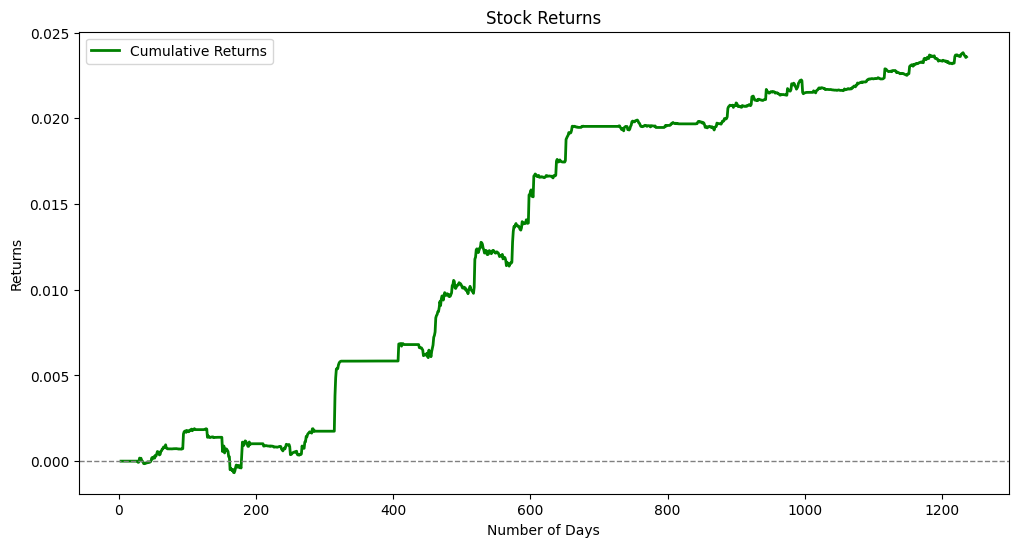

In [50]:
daily_returns = stock_data['Daily_return']/100.0

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Create a range of numbers for the x-axis representing the number of days
x_axis = range(1, len(daily_returns) + 1)

plt.figure(figsize=(12, 6))
# Plot the cumulative returns
plt.plot(x_axis, cumulative_returns, label='Cumulative Returns', color='green', lw=2)

# Add labels and title
plt.xlabel('Number of Days')
plt.ylabel('Returns')
plt.title('Stock Returns')

# Add a horizontal line at 0 (representing no return)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Add legend
plt.legend()

# Show the plot
plt.show()